 *Hello Everyone, this is my first submission for any kaggle challenge ever. So i have been learning Power BI just as a new skill and I thought, why not try it out as an initial data-viz tool to get better insights to start off rather than just directly using Seaborn or MatplotLib as trial and error. I have a few gifs below on what I have done in Power BI, which yielded pretty good results from the purview of gathering initial insights. So I have come up with a number of Conclusions from these visalizations which i shall list after the gifs have been uploaded. If anyone would like a bit of help with the power BI aspect of it, please feel free to contact me, I shall leave a Mail ID at the end of the Notebook :)*

*So i have been using Google Colab to do this challenge, so there will be snippets of code on Mounting my Drive as such*

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display

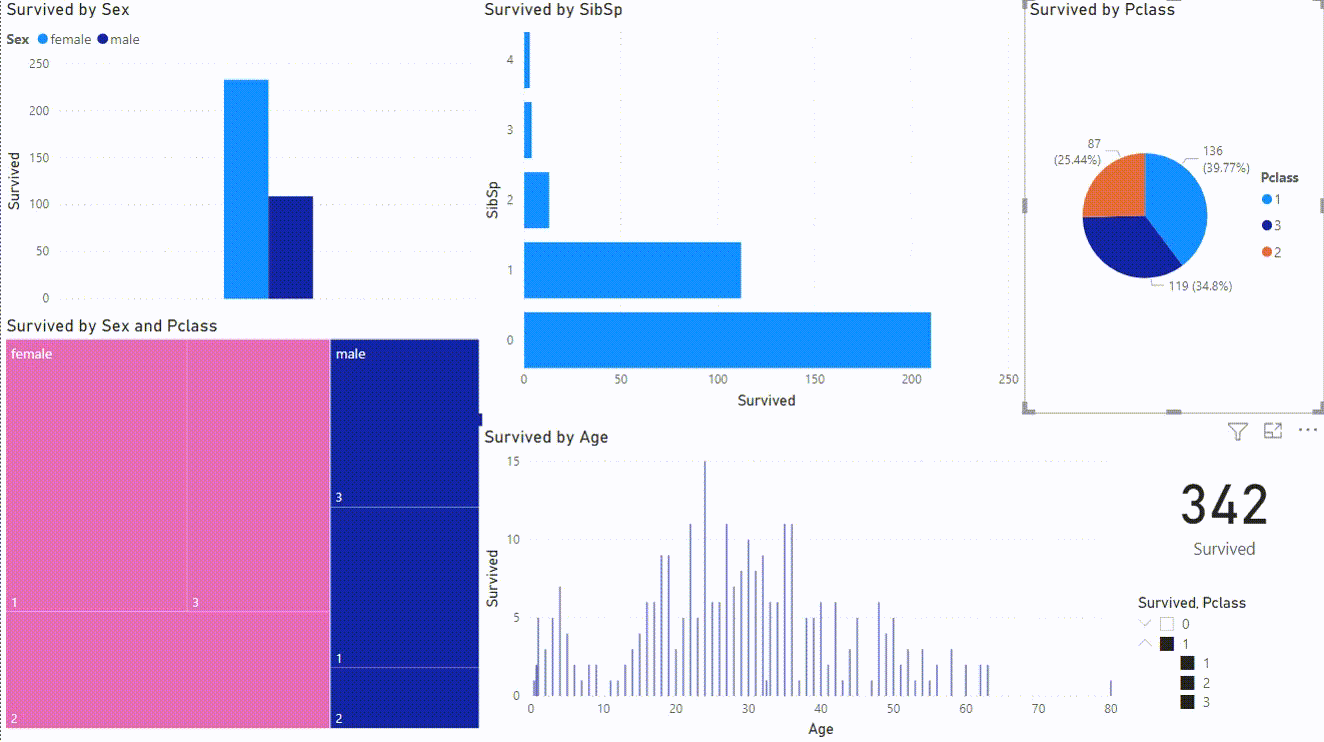

Overall Gif Screen


In [ ]:
from pathlib import Path
gif_path = '/content/drive/MyDrive/Titanic_Data/Gif Video/Overall Screen.gif'
with open(gif_path,'rb') as f:
  display.Image(data=f.read(), format='png')

print("Overall Gif Screen")

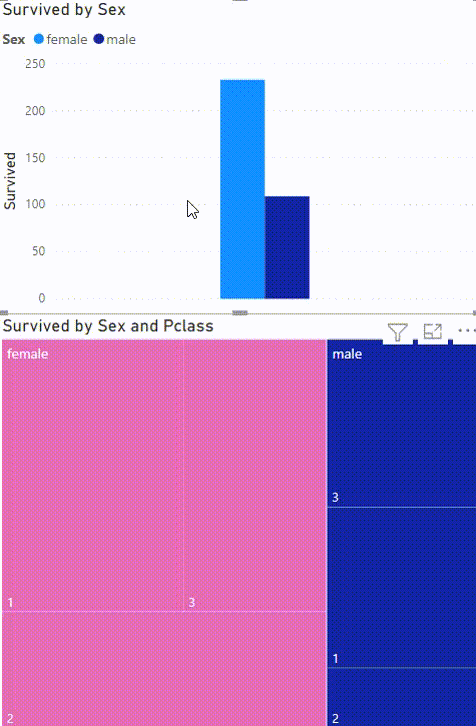

In [ ]:
from pathlib import Path
gif_path1 = '/content/drive/MyDrive/Titanic_Data/Gif Video/Dividing Based On Male and Female.gif'
with open(gif_path1,'rb') as f:
  display.Image(data=f.read(), format='png')

###### So from the Power BI Visualizations, I could see which values were predominant, values which were missing, values which would have high or low correlation to the survival percentage and I have made a number of changes in the PowerBI DataFrame itself, but now i will be using Pandas for changes within the notebook.

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_set = pd.read_csv('/content/drive/MyDrive/Titanic_Data/train.csv')
test_set = pd.read_csv('/content/drive/MyDrive/Titanic_Data/test.csv')
train_set.head(3)
print('\n')
print('\n')
test_set.head(3)

In [ ]:
train_set.info()
print('\n')
print('\n')
train_set.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB






,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test_set.info()
print('\n')
print('\n')
test_set.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB






,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
t1 = train_set[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean()
t2 = train_set[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean()
t3 = train_set[['SibSp', 'Survived']].groupby(['SibSp'], as_index = True).mean()
t4 = train_set[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean()
t5 = train_set[['Parch', 'Survived']].groupby(['Parch'], as_index = True).mean()
t6 = train_set[['Fare', 'Survived']].groupby(['Fare'], as_index = True).mean()

In [ ]:
import pandas as pd   
from IPython.display import display_html 

df1_styler = t1.style.set_table_attributes("style='display:inline'").set_caption('% of Survived based on Sex')
df2_styler = t2.style.set_table_attributes("style='display:inline'").set_caption('% of Survived based on Class')
df3_styler = t3.style.set_table_attributes("style='display:inline'").set_caption('% of Survived based on Sibling and Spouses')
df4_styler = t4.style.set_table_attributes("style='display:inline'").set_caption('% of Survived based on Embark Location')
df5_styler = t5.style.set_table_attributes("style='display:inline'").set_caption('% of Survived based on Parents and Children')
df6_styler = t6.style.set_table_attributes("style='display:inline'").set_caption('% of Survived based on Fare')

space = "\xa0" * 13
display_html(df1_styler._repr_html_()+ space + df2_styler._repr_html_() + space + df3_styler._repr_html_() + space + df4_styler._repr_html_() + space + df5_styler._repr_html_(), raw=True)


,Survived
Sex,
female,0.742038
male,0.188908
,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363
,Survived
SibSp,


###### *So Now from this Pandas Based Data Display, we can get a clearer picture as to which factors are directly influencing survival of an Individual. Personally, the factors which can contribute to this are the same as Above, Except Age and Fare (Fare we can assume as nearly fully corellated to Pclass (higher fare, first class and vice versa), but I will be using Fare As Well as an Input Feature. I will not be showing the Fare As a table above currently, as there are various different values for fare, which we shall encode within a range to Allow a better encoding.*

*From this cell henceforth, I have come to a number of of conclusions which are related to cleaning data. In the PowerBI Visualizations, I could easily clean these values using the replace values command, but here I will use Pandas and Numpy where necessary. The Changes I Will be making are as Follows.
1:Encoding male as 0 and female as 1
2:Removing the name column, Maybe i will utilize it later 
3:Encoding the Embarked points as numbers in alphabetical order i.e. C:1, Q:2 and S:3 
4: Replaced all missing age values as 99 (I did this in Power BI as to avoid a skew in my graph, but i Have used the Simple Imputer here to fill in the data as median)
5:Removed Passenger ID from Train and test Data as it is just count 
6:Ticket ID Removed from Train and Test data
7:2 absent Embarked Values in train set were encoded as UnK and later as 4*
8: All the Absent Fare Values were filled with median values
9: Empty Values in  Cabin Column have been replaced as 'NS'

In [ ]:
# duplicate the train set 
DTrain = train_set
DTest = test_set
#Replace Sex First- male:0 and female:1
DTrain['Sex'].replace(to_replace = 'male', value = 0, inplace = True)
DTrain['Sex'].replace(to_replace = 'female', value = 1, inplace = True)
DTest['Sex'].replace(to_replace = 'male', value = 0, inplace = True)
DTest['Sex'].replace(to_replace = 'female', value = 1, inplace = True)
DTrain.head(3)
print('\n')
print('\n')
DTest.head(3)

In [ ]:
# Drop Passenger ID and Ticket and name
DTrain.drop(['PassengerId','Ticket'], axis = 1, inplace = True)
DTest.drop(['PassengerId','Ticket'], axis = 1, inplace = True)
DTrain.head(3)
print('\n')
print('\n')
DTest.head(3)

In [ ]:
#Replacing the Values of Embarked in Training and Test Set
DTrain['Embarked'].replace(to_replace = 'C', value = 1, inplace = True)
DTrain['Embarked'].replace(to_replace = 'Q', value = 2, inplace = True)
DTrain['Embarked'].replace(to_replace = 'S', value = 3, inplace = True)
DTest['Embarked'].replace(to_replace = 'C', value = 1, inplace = True)
DTest['Embarked'].replace(to_replace = 'Q', value = 2, inplace = True)
DTest['Embarked'].replace(to_replace = 'S', value = 3, inplace = True)

DTrain['Embarked'].fillna("UnK", inplace = True)
DTest['Embarked'].fillna("UnK", inplace = True)
DTest['Fare'].fillna((DTest['Fare'].median()), inplace = True)
DTrain['Embarked'].replace(to_replace = 'UnK', value = 4, inplace = True)
DTest['Embarked'].replace(to_replace = 'UnK', value = 4, inplace = True)

In [ ]:
#Making another Duplicate Dataframe
DTS2 = pd.read_csv('/content/drive/MyDrive/Titanic_Data/train.csv')
DTeS2 = pd.read_csv('/content/drive/MyDrive/Titanic_Data/test.csv')
#DTS2.columns

In [ ]:
DTrain['Cabin'].fillna("NS", inplace = True)
DTrain['Cabin'].isna().sum()
print('\n')
DTest['Cabin'].fillna("NS", inplace = True)
DTest['Cabin'].isna().sum()
DTest['Fare'].fillna((DTest['Fare'].median()), inplace = True)

## Filling the Missing Age Values using Simple Imputer

from sklearn.impute import SimpleImputer 
imr = SimpleImputer(missing_values=np.nan, strategy='median')
imr = imr.fit(DTrain[['Age']])
DTrain['Age'] = imr.transform(DTrain[['Age']])

imr1 = SimpleImputer(missing_values=np.nan, strategy='median')
imr1 = imr.fit(DTest[['Age']])
DTest['Age'] = imr1.transform(DTest[['Age']])

In [ ]:
DTrain.info()
print('\n')
DTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     891 non-null    object 
 9   Embarked  891 non-null    float64
dtypes: float64(3), int64(5), object(2)
memory usage: 69.7+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    int64  
 3   Age       418 non-null    float64
 4   SibSp     418 non-n

In [ ]:
DTrain['Age_Divide'] = pd.cut(DTrain['Age'],6)
t8 = DTrain.groupby('Age_Divide', as_index=False)['Survived'].mean().sort_values(by = 'Survived', ascending = False)
DTrain['Age_Divide_Q'] = pd.qcut(DTrain['Age'],5, duplicates = 'drop')
t9 = DTrain.groupby('Age_Divide_Q', as_index=False)['Survived'].mean().sort_values(by = 'Survived', ascending = False)
DTrain['Fare_Divide'] = pd.cut(DTrain['Fare'],7)
t10 = DTrain.groupby('Fare_Divide', as_index=False)['Survived'].mean().sort_values(by = 'Survived', ascending = False)
DTrain['Fare_Divide_Q'] = pd.qcut(DTrain['Fare'],4)
t11 = DTrain.groupby('Fare_Divide_Q', as_index=False)['Survived'].mean().sort_values(by = 'Survived', ascending = False)

In [ ]:
df7_styler = t8.style.set_table_attributes("style='display:inline'").set_caption('Age Band Based Survival %')
df8_styler = t9.style.set_table_attributes("style='display:inline'").set_caption('Age Band Based Survival %(Quartile Based Cut)')
df9_styler = t10.style.set_table_attributes("style='display:inline'").set_caption('Fare Band Based Survival %')
df10_styler = t11.style.set_table_attributes("style='display:inline'").set_caption('Fare Band Based Survival % (Quartile Based Cut)')
space = "\xa0" * 7
display_html(df7_styler._repr_html_()+ space + df8_styler._repr_html_() + space + df9_styler._repr_html_() + space + df10_styler._repr_html_(), raw=True)

,Age_Divide,Survived
0,"(0.34, 13.683]",0.591549
3,"(40.21, 53.473]",0.390000
2,"(26.947, 40.21]",0.372038
1,"(13.683, 26.947]",0.354839
4,"(53.473, 66.737]",0.348837
5,"(66.737, 80.0]",0.142857
,Age_Divide_Q,Survived
0,"(0.419, 20.0]",0.458101
2,"(28.0, 38.0]",0.434286
3,"(38.0, 80.0]",0.372881


In [ ]:
r = [0, 20, 25, 30, 40, 80]
g = [0,1,2,3,4]
DTrain['Age'] = pd.cut(DTrain['Age'], bins=r, labels=g)
DTest['Age'] = pd.cut(DTest['Age'], bins=r, labels=g)

In [ ]:
r1 = [-0.001,8,15,31,513]
g1 = [0,1,2,3]
DTrain['Fare'] = pd.cut(DTrain['Fare'], bins = r1, labels = g1)
DTest['Fare'] = pd.cut(DTest['Fare'], bins = r1, labels = g1)

In [ ]:
DTrain['Cabin'] = DTrain['Cabin'].astype(str).str[0]
DTest['Cabin'] = DTest['Cabin'].astype(str).str[0]
t12 = DTrain[['Cabin', 'Survived']].groupby(['Cabin'], as_index = True).mean().sort_values(by = 'Survived', ascending = False)
print(t12)

       Survived
Cabin          
D      0.757576
E      0.750000
B      0.744681
F      0.615385
C      0.593220
G      0.500000
A      0.466667
N      0.299854
T      0.000000


In [ ]:
#DTS2['Cabin'].fillna("NS", inplace = True)
#DTS2['Cabin'].isna().sum()
#print('\n')
#DTeS2['Cabin'].fillna("NS", inplace = True)
#DTeS2['Cabin'].isna().sum()
DTrain['Cabin'] = DTrain['Cabin'].astype(str).str[0]
DTest['Cabin'] = DTest['Cabin'].astype(str).str[0]
DTrain.head(5)
print('\n')
DTrain.head(5)

In [ ]:
# Now we are Putting the Cabin Survival Percentage into 4 Categories 
# 0: Survival% between 0-49%
# 1: Survival% between 50-69%
# 2: Survival% >70%
# 3: Those Whose Cabin Hasn't been given ('NS' Value)

DTrain['Cabin'].replace(to_replace = 'T', value = 0, inplace = True)
DTrain['Cabin'].replace(to_replace = 'A', value = 0, inplace = True)
DTrain['Cabin'].replace(to_replace = 'C', value = 1, inplace = True)
DTrain['Cabin'].replace(to_replace = 'F', value = 1, inplace = True)
DTrain['Cabin'].replace(to_replace = 'G', value = 1, inplace = True)
DTrain['Cabin'].replace(to_replace = 'B', value = 2, inplace = True)
DTrain['Cabin'].replace(to_replace = 'D', value = 2, inplace = True)
DTrain['Cabin'].replace(to_replace = 'E', value = 2, inplace = True)
DTrain['Cabin'].replace(to_replace = 'N', value = 3, inplace = True)

DTest['Cabin'].replace(to_replace = 'T', value = 0, inplace = True)
DTest['Cabin'].replace(to_replace = 'A', value = 0, inplace = True)
DTest['Cabin'].replace(to_replace = 'C', value = 1, inplace = True)
DTest['Cabin'].replace(to_replace = 'F', value = 1, inplace = True)
DTest['Cabin'].replace(to_replace = 'G', value = 1, inplace = True)
DTest['Cabin'].replace(to_replace = 'B', value = 2, inplace = True)
DTest['Cabin'].replace(to_replace = 'D', value = 2, inplace = True)
DTest['Cabin'].replace(to_replace = 'E', value = 2, inplace = True)
DTest['Cabin'].replace(to_replace = 'N', value = 3, inplace = True)

In [ ]:
t13 = DTrain[['Cabin', 'Survived']].groupby(['Cabin'], as_index = True).mean().sort_values(by = 'Survived', ascending = False)
print(t13)

       Survived
Cabin          
2      0.750000
1      0.592105
0      0.437500
3      0.299854


In [ ]:
DTrain.head(10)
print('\n')
DTest.head(10)

In [ ]:
DTrain.drop(['Age_Divide','Age_Divide_Q','Fare_Divide','Fare_Divide_Q'], axis = 1, inplace = True)

In [ ]:
DTrain.info()
print('\n')
DTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    int64   
 4   Age       891 non-null    category
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Fare      891 non-null    category
 8   Cabin     891 non-null    int64   
 9   Embarked  891 non-null    float64 
dtypes: category(2), float64(1), int64(6), object(1)
memory usage: 57.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    int64   
 1   Name      418 non-null    object  
 2   Sex       418 non-null    int64   
 3   Age       418 non-null    ca

In [ ]:
DTrain.columns
print('\n')
DTest.columns

In [ ]:
#Model Builder# Starting off with Random Forest 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
Y_Train = DTrain['Survived']
feats = ['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']
X_Train = DTrain[feats]
X_Test = DTest[feats]

XTrain, XVal, yTrain, yVal = train_test_split(X_Train, Y_Train, test_size=0.1, random_state=27)

In [ ]:
Rand_Forest = RandomForestClassifier(n_estimators=130, max_depth=13, random_state=1)
Rand_Forest.fit(XTrain, yTrain)
# predict
Predictions = Rand_Forest.predict(X_Train)
Predictions2 = Rand_Forest.predict(XVal)
#accuracy = accuracy_score(X_Test, Predictions2)
# evaluate
RF_Acc = ((Rand_Forest.score(XTrain, yTrain))*100)
print('\n')
print('Accuracy Score: ', RF_Acc)
print('\n')
print('\nConfusion Matrix: ', confusion_matrix(Y_Train, Predictions))
print('\n')
print('\nClassification Report: ', classification_report(Y_Train, Predictions))
print('\n')
print(Predictions2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=130,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)



Accuracy Score:  90.76154806491886



Confusion Matrix:  [[519  30]
 [ 61 281]]



Classification Report:                precision    recall  f1-score   support

           0       0.89      0.95      0.92       549
           1       0.90      0.82      0.86       342

    accuracy                           0.90       891
   macro avg       0.90      0.88      0.89       891
weighted avg       0.90      0.90      0.90       891



[0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1
 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1]


In [ ]:
importances = Rand_Forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rand_Forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
feature_df = pd.DataFrame(X_Train.columns)
feature_df.columns = ['Importance']

# print feature ranking
feature_df['Feature'] = pd.Series(importances)
feature_df.sort_values(by='Feature', ascending=False, inplace=True)
print(feature_df)

  Importance   Feature
1        Sex  0.324859
2        Age  0.144745
5       Fare  0.122718
0     Pclass  0.106099
6      Cabin  0.089135
4      Parch  0.079097
3      SibSp  0.077706
7   Embarked  0.055641


In [ ]:
# Using SVM 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=10,random_state=1, shuffle = True)

In [ ]:
svc = SVC(C = 200, kernel = 'rbf',  gamma = 0.1)
svc.fit(X_Train, Y_Train) 
acc_SVM = cross_val_score(svc,X_Train,Y_Train,cv=kf)
print('\n')
print('Predicted Accuracy Score is', (acc_SVM.mean()*100))

SVC(C=200, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)



Predicted Accuracy Score is 81.03620474406992


In [ ]:
#Finding Optimal Hyperparameter tuning using Gridsearch
from sklearn.model_selection import GridSearchCV 
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'linear', 'sigmoid']}
svc_gs = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2) 
# fitting the model for grid search 
svc_gs.fit(X_Train, Y_Train) 

In [ ]:
acc_SVM_gs = cross_val_score(svc_gs,X_Train,Y_Train)
print('Predicted Accuracy Score is', (acc_SVM_gs.mean()*100))
print('\n')
print('The Best Params which we have found are \n', svc_gs.best_params_)
print('\n')
print('The Optimal Estimators we have obtained from GridSearch Are \n', svc_gs.best_estimator_)

In [ ]:
svc_predictions = svc.predict(X_Test)   
svc_gs_predictions = svc_gs.predict(X_Test)   
# print classification report 
print(svc_predictions)
print('\n')
print(svc_gs_predictions) 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors = 3) 
Knn.fit(X_Train, Y_Train)  
Y_pred = Knn.predict(X_Test)  
acc_knn = round(Knn.score(X_Train, Y_Train) * 100, 2)
print('\n')
print('KNN Acuuracy is : ', acc_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')



KNN Acuuracy is :  86.08


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier 

In [ ]:
LR = LogisticRegression()
DT = DecisionTreeClassifier()
GNB = GaussianNB()
Classifiers = [('Logistic Regression', LR), ('Decision Trees', DT), ('Naive Bayes Classifier', GNB)]
Voting_Clf = VotingClassifier(estimators = Classifiers, voting = 'hard')
Voting_Clf_Soft = VotingClassifier(estimators = Classifiers, voting = 'soft')

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.model_selection import train_test_split, KFold, cross_val_score
# Make the train/test data from validation

X_tr, X_val, y_tr, y_val = train_test_split(X_Train, Y_Train, test_size=0.1, random_state=27)

In [ ]:
Voting_Clf.fit(X_tr, y_tr)
preds = Voting_Clf.predict(X_val)
acc = accuracy_score(y_val, preds)
l_loss = log_loss(y_val, preds)
f1 = f1_score(y_val, preds)

print('\n')
print("Accuracy is: " + str(acc))
print("Log Loss is: " + str(l_loss))
print("F1 Score is: " + str(f1))

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('Decision Trees',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_we...
                                                     max_depth=None,
                       



Accuracy is: 0.8444444444444444
Log Loss is: 5.372751856814786
F1 Score is: 0.7941176470588236


In [ ]:
preds = Voting_Clf.predict(X_Test)
print(preds)
acc_VC_H = round((acc*100),2)
print('\n')
print((acc_VC_H.mean()), 'Percent Accuracy Achieved')


[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0
 0 1 1 1 1 0 0 1 0 0 0]


84.44 Percent Accuracy Achieved


In [ ]:
Voting_Clf_Soft.fit(X_tr, y_tr)
preds_s = Voting_Clf_Soft.predict(X_val)
acc_s = accuracy_score(y_val, preds_s)
acc_VC_S = round((acc_s*100),2)
l_loss_s = log_loss(y_val, preds_s)
f1_s = f1_score(y_val, preds_s)

print('\n')
print("Accuracy is: " + str(acc_s))
print("Log Loss is: " + str(l_loss_s))
print("F1 Score is: " + str(f1_s))

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('Decision Trees',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_we...
                                                     max_depth=None,
                       



Accuracy is: 0.8444444444444444
Log Loss is: 5.372734087983004
F1 Score is: 0.7812500000000001


In [ ]:
Table1 = {'Name of Classifier':['Random Forest', 'SVM', 'SVM w GridSearch', 'K Nearest Neighbors', 'Voting Clf(Hard Voting)','Voting Clf(Soft Voting)' ], 
        'Accuracy %':[RF_Acc, acc_SVM.mean()*100, acc_SVM_gs.mean()*100, acc_knn, acc_VC_H, acc_VC_S]} 
# Create DataFrame 
pd.set_option('display.max_columns', None)
Acc_Table = pd.DataFrame(Table1) 
print(Acc_Table)

        Name of Classifier  Accuracy %
0            Random Forest   90.761548
1                      SVM   81.036205
2         SVM w GridSearch   80.807859
3      K Nearest Neighbors   86.080000
4  Voting Clf(Hard Voting)   84.440000
5  Voting Clf(Soft Voting)   84.440000


In [ ]:
# Now that we have seen all The Accuracies 
#we get with these features, lets add another 
#feature to try and increase the accuracy. 
#For this we will be adding the family size parameter = the siblingsp + the Parch Column
DTrain["Family_Size"] = DTrain['SibSp'] + DTrain['Parch'] + 1
DTest["Family_Size"] = DTest['SibSp'] + DTest['Parch'] + 1

In [ ]:
t13 = DTrain[['Family_Size', 'Survived']].groupby(['Family_Size'], as_index = True).mean().sort_values(by = 'Survived', ascending = False)
print(t13)

             Survived
Family_Size          
4            0.724138
3            0.578431
2            0.552795
7            0.333333
1            0.303538
5            0.200000
6            0.136364
8            0.000000
11           0.000000


In [ ]:
r2 = [0,1,6,11]
g2 = [0,1,2]
DTrain['Family_Size'] = pd.cut(DTrain['Family_Size'], bins=r2, labels=g2)
DTest['Family_Size'] = pd.cut(DTest['Family_Size'], bins=r2, labels=g2)
t14 = DTrain[['Family_Size', 'Survived']].groupby(['Family_Size'], as_index = True).mean().sort_values(by = 'Survived', ascending = False)
print(t14)

             Survived
Family_Size          
1            0.531915
0            0.303538
2            0.160000


In [ ]:
DTrain['Title'] = DTrain['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
DTest['Title'] = DTest['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
DTrain['Title'].value_counts()
print('\n')
DTest['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Ms                1
Don               1
Sir               1
the Countess      1
Jonkheer          1
Mme               1
Lady              1
Capt              1
Name: Title, dtype: int64

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

In [ ]:
DTrain['Title'] = DTrain['Title'].replace(['Dr','Rev', 'Mlle', 'Major', 'Col', 'Lady', 'Mme','Sir', 'Capt', 'Jonkheer', 'Don', 'Ms', 'the Countess'], 'Sparse')
DTest['Title'] = DTest['Title'].replace(['Dr', 'Rev', 'Dona', 'Mme', 'Col','Ms'], 'Sparse')
DTrain['Title'].value_counts()
print('\n')
DTest['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Sparse     27
Name: Title, dtype: int64

Mr        240
Miss       78
Mrs        72
Master     21
Sparse      7
Name: Title, dtype: int64

In [ ]:
t15 = DTrain[['Title', 'Survived']].groupby(['Title'], as_index = True).mean().sort_values(by = 'Survived', ascending = False)
print(t15)
print('\n')
DTrain['Title_Replace_Sex'] = DTrain['Title']
DTrain['Title_Replace_Ind'] = DTrain['Title']
DTest['Title_Replace_Sex'] = DTest['Title']
DTest['Title_Replace_Ind'] = DTest['Title']

In [ ]:
# I feel there are 2 ways to replace the values in the Title Dataframe 
# The first way is to change it based on sex i.e. Mr and Master as 0 and 
# Miss and Mrs. as 1 and Sparse as 2 just to maintain the uniformity 
DTrain['Title_Replace_Sex'].replace(to_replace = 'Mr', value = 0, inplace = True)
DTrain['Title_Replace_Sex'].replace(to_replace = 'Miss', value = 1, inplace = True)
DTrain['Title_Replace_Sex'].replace(to_replace = 'Mrs', value = 1, inplace = True)
DTrain['Title_Replace_Sex'].replace(to_replace = 'Master', value = 0, inplace = True)
DTrain['Title_Replace_Sex'].replace(to_replace = 'Sparse', value = 2, inplace = True)

DTest['Title_Replace_Sex'].replace(to_replace = 'Mr', value = 0, inplace = True)
DTest['Title_Replace_Sex'].replace(to_replace = 'Miss', value = 1, inplace = True)
DTest['Title_Replace_Sex'].replace(to_replace = 'Mrs', value = 1, inplace = True)
DTest['Title_Replace_Sex'].replace(to_replace = 'Master', value = 0, inplace = True)
DTest['Title_Replace_Sex'].replace(to_replace = 'Sparse', value = 2, inplace = True)

In [ ]:
# the second way to replace the vlaues would be to replace all the values independently 
# Hence the Names Title_replace_Sex, and Title_Replace_ind  and we will calculate all the values of accuracy independently

DTrain['Title_Replace_Ind'].replace(to_replace = 'Mr', value = 1, inplace = True)
DTrain['Title_Replace_Ind'].replace(to_replace = 'Miss', value = 2, inplace = True)
DTrain['Title_Replace_Ind'].replace(to_replace = 'Mrs', value = 3, inplace = True)
DTrain['Title_Replace_Ind'].replace(to_replace = 'Master', value = 4, inplace = True)
DTrain['Title_Replace_Ind'].replace(to_replace = 'Sparse', value = 5, inplace = True)

DTest['Title_Replace_Ind'].replace(to_replace = 'Mr', value = 1, inplace = True)
DTest['Title_Replace_Ind'].replace(to_replace = 'Miss', value = 2, inplace = True)
DTest['Title_Replace_Ind'].replace(to_replace = 'Mrs', value = 3, inplace = True)
DTest['Title_Replace_Ind'].replace(to_replace = 'Master', value = 4, inplace = True)
DTest['Title_Replace_Ind'].replace(to_replace = 'Sparse', value = 5, inplace = True)

In [ ]:
DTrain['Title_Replace_Sex'].value_counts()
print('\n')
DTest['Title_Replace_Sex'].value_counts()
print('\n')
DTrain['Title_Replace_Ind'].value_counts()
print('\n')
DTest['Title_Replace_Ind'].value_counts()

0    557
1    307
2     27
Name: Title_Replace_Sex, dtype: int64

0    261
1    150
2      7
Name: Title_Replace_Sex, dtype: int64

1    517
2    182
3    125
4     40
5     27
Name: Title_Replace_Ind, dtype: int64

1    240
2     78
3     72
4     21
5      7
Name: Title_Replace_Ind, dtype: int64

In [ ]:
DTrain.drop(['Name','Title'], axis = 1, inplace = True)
DTest.drop(['Name','Title'], axis = 1, inplace = True)

In [ ]:
DTrain.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'Family_Size', 'Title_Replace_Sex', 'Title_Replace_Ind'],
      dtype='object')

In [ ]:
# Trying with the Title Replaced as Sex Column
Y_Train1 = DTrain['Survived']
feats1 = ['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked','Family_Size', 'Title_Replace_Sex']
X_Train1 = DTrain[feats1]
X_Test1 = DTest[feats1]

XTrain1, XVal1, yTrain1, yVal1 = train_test_split(X_Train1, Y_Train1, test_size=0.1, random_state=43)

In [ ]:
Rand_Forest1 = RandomForestClassifier(n_estimators=130, max_depth=13, random_state=1)
Rand_Forest1.fit(XTrain1, yTrain1)
# evaluate
RF_Acc1 = ((Rand_Forest1.score(XTrain1, yTrain1))*100)

#Normal SVM Accuracy
svc1 = SVC(C = 200, kernel = 'rbf',  gamma = 0.1)
svc1.fit(XTrain1, yTrain1) 
acc_SVM1 = cross_val_score(svc1,XTrain1,yTrain1,cv=kf)
##SVM w GridSearch 
param_grid1 = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'linear', 'sigmoid']}
svc_gs1 = GridSearchCV(SVC(), param_grid1, refit = True, verbose = 2)  
svc_gs1.fit(XTrain1, yTrain1)
acc_SVM_gs1 = cross_val_score(svc_gs1,XTrain1,yTrain1,cv=kf)

In [ ]:
# K Nearest Neighbors
Knn1 = KNeighborsClassifier(n_neighbors = 3) 
Knn1.fit(XTrain1, yTrain1)  
acc_knn1 = round(Knn1.score(XTrain1, yTrain1) * 100, 2)

# Voting Classifier

LR1 = LogisticRegression()
DT1 = DecisionTreeClassifier()
GNB1 = GaussianNB()
Classifiers1 = [('Logistic Regression', LR1), ('Decision Trees', DT1), ('Naive Bayes Classifier', GNB1)]
Voting_Clf_Hard1 = VotingClassifier(estimators = Classifiers1, voting = 'hard')
Voting_Clf_Soft1 = VotingClassifier(estimators = Classifiers1, voting = 'soft')

# VC (Hard Voting Fit)
Voting_Clf_Hard1.fit(XTrain1, yTrain1)
preds1 = Voting_Clf_Hard1.predict(XTrain1)
acc1 = accuracy_score(yTrain1, preds1)
acc_VC_H1 = round((acc1*100),2)

#VC (Soft Voting Fit)
Voting_Clf_Soft1.fit(XTrain1, yTrain1)
preds_s1 = Voting_Clf_Soft1.predict(XTrain1)
acc_s1 = accuracy_score(yTrain1, preds_s1)
acc_VC_S1 = round((acc_s1*100),2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('Decision Trees',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_we...
                                                     max_depth=None,
                       

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('Decision Trees',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_we...
                                                     max_depth=None,
                       

In [ ]:
print('Accuracy Score for Random Forest is : ', RF_Acc1)
print('\n')
print('Predicted Accuracy Score for SVM without GridSearch is : ', (acc_SVM1.mean()*100))
print('\n')
print('Predicted Accuracy Score for SVM with GridSearch is : ', (acc_SVM_gs1.mean()*100))
print('\n')
print('KNN Acuuracy is : ', acc_knn1)
print('\n')
print((acc_VC_H1.mean()), 'Percent Accuracy Achieved in Voting Classifier (Hard Voting)')
print('\n')
print((acc_VC_S1.mean()), 'Percent Accuracy Achieved in Voting Classifier (Soft Voting)')

Accuracy Score for Random Forest is :  92.13483146067416


Predicted Accuracy Score for SVM without GridSearch is :  80.65123456790124


Predicted Accuracy Score for SVM with GridSearch is :  82.14660493827161


KNN Acuuracy is :  87.77


83.4 Percent Accuracy Achieved in Voting Classifier (Hard Voting)


86.02 Percent Accuracy Achieved in Voting Classifier (Soft Voting)


In [ ]:
#Trying with the Title Changed Independently Column
Y_Train2 = DTrain['Survived']
feats2 = ['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked','Family_Size', 'Title_Replace_Ind']
X_Train2 = DTrain[feats2]
X_Test2 = DTest[feats2]

XTrain2, XVal2, yTrain2, yVal2 = train_test_split(X_Train2, Y_Train2, test_size=0.1, random_state=44)

In [ ]:
Rand_Forest2 = RandomForestClassifier(n_estimators=130, max_depth=13, random_state=1)
Rand_Forest2.fit(XTrain2, yTrain2)
# predict
#Predictions = Rand_Forest.predict(X_Train)
#accuracy = accuracy_score(X_Test, Predictions2)
# evaluate
RF_Acc2 = ((Rand_Forest2.score(XTrain2, yTrain2))*100)

#Normal SVM Accuracy
svc2 = SVC(C = 200, kernel = 'rbf',  gamma = 0.1)
svc2.fit(XTrain2, yTrain2) 
acc_SVM2 = cross_val_score(svc2,XTrain2,yTrain2,cv=kf)

##SVM w GridSearch 
param_grid2 = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'linear', 'sigmoid']}
svc_gs2 = GridSearchCV(SVC(), param_grid2, refit = True, verbose = 2)  
svc_gs2.fit(XTrain2, yTrain2)
acc_SVM_gs2 = cross_val_score(svc_gs2,XTrain2,yTrain2,cv=kf)

In [ ]:
# K Nearest Neighbors
Knn2 = KNeighborsClassifier(n_neighbors = 3) 
Knn2.fit(XTrain2, yTrain2)  
acc_knn2 = round(Knn2.score(XTrain2, yTrain2) * 100, 2)

# Voting Classifier

LR2 = LogisticRegression()
DT2 = DecisionTreeClassifier()
GNB2 = GaussianNB()
Classifiers2 = [('Logistic Regression', LR2), ('Decision Trees', DT2), ('Naive Bayes Classifier', GNB2)]
Voting_Clf_Hard2 = VotingClassifier(estimators = Classifiers2, voting = 'hard')
Voting_Clf_Soft2 = VotingClassifier(estimators = Classifiers2, voting = 'soft')

# VC (Hard Voting Fit)
Voting_Clf_Hard2.fit(XTrain2, yTrain2)
preds2 = Voting_Clf_Hard2.predict(XTrain2)
acc2 = accuracy_score(yTrain2, preds2)
acc_VC_H2 = round((acc2*100),2)

#VC (Soft Voting Fit)
Voting_Clf_Soft2.fit(XTrain2, yTrain2)
preds_s2 = Voting_Clf_Soft2.predict(XTrain2)
acc_s2 = accuracy_score(yTrain2, preds_s2)
acc_VC_S2 = round((acc_s2*100),2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('Decision Trees',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_we...
                                                     max_depth=None,
                       

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('Decision Trees',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_we...
                                                     max_depth=None,
                       

In [ ]:
print('Accuracy Score for Random Forest is : ', RF_Acc2)
print('\n')
print('Predicted Accuracy Score for SVM without GridSearch is : ', (acc_SVM2.mean()*100))
print('\n')
print('Predicted Accuracy Score for SVM with GridSearch is : ', (acc_SVM_gs2.mean()*100))
print('\n')
print('KNN Acuuracy is : ', acc_knn2)
print('\n')
print((acc_VC_H2.mean()), 'Percent Accuracy Achieved in Voting Classifier (Hard Voting)')
print('\n')
print((acc_VC_S2.mean()), 'Percent Accuracy Achieved in Voting Classifier (Soft Voting)')

Accuracy Score for Random Forest is :  91.88514357053683


Predicted Accuracy Score for SVM without GridSearch is :  81.90123456790121


Predicted Accuracy Score for SVM with GridSearch is :  83.02160493827161


KNN Acuuracy is :  86.64


84.77 Percent Accuracy Achieved in Voting Classifier (Hard Voting)


86.89 Percent Accuracy Achieved in Voting Classifier (Soft Voting)


In [ ]:
Acc_Table.insert(2, "Accuracy %(Sex Based)", [RF_Acc1, (acc_SVM1.mean()*100) , (acc_SVM_gs1.mean()*100), acc_knn1, (acc_VC_H1.mean()), (acc_VC_S1.mean())], True) 
Acc_Table.insert(3, "Accuracy %(Independent)", [RF_Acc2, (acc_SVM2.mean()*100) , (acc_SVM_gs2.mean()*100), acc_knn2, (acc_VC_H2.mean()), (acc_VC_S2.mean())], True) 
print(Acc_Table)


        Name of Classifier  Accuracy %  Accuracy %(Sex Based)  \
0            Random Forest   90.761548              92.134831   
1                      SVM   81.036205              80.651235   
2         SVM w GridSearch   80.807859              82.146605   
3      K Nearest Neighbors   86.080000              87.770000   
4  Voting Clf(Hard Voting)   84.440000              83.400000   
5  Voting Clf(Soft Voting)   84.440000              86.020000   

   Accuracy %(Independent)  
0                91.885144  
1                81.901235  
2                83.021605  
3                86.640000  
4                84.770000  
5                86.890000  


In [ ]:
# Now We Have the highest Accuracies on the training sets,
# We will Calculate the Validation Accuracies on each of the highest Values and 
# Predict the Values for the Submission File for each accuracy as well

#Random Forest 
RF_Acc_Highest = ((Rand_Forest1.score(XVal1, yVal1))*100)

#SVM 
acc_SVM_Highest = cross_val_score(svc2,XVal2,yVal2)

#SVM w GridSearch
acc_SVM_gs_Highest = cross_val_score(svc_gs2,XTrain2,yTrain2)

#KNN
acc_knn_Highest = round(Knn1.score(XVal1, yVal1) * 100, 2)

#Voting Classifier (Hard Voting)
preds_VC_Hard_Highest = Voting_Clf_Hard2.predict(XVal2)
acc_VC_H_Highest = accuracy_score(yVal2, preds_VC_Hard_Highest)

#Voting Classifier (Soft Voting)
preds_VC_Soft_Highest = Voting_Clf_Soft2.predict(XVal2)
acc_VC_S_Highest = accuracy_score(yVal2, preds_VC_Soft_Highest)


In [ ]:
print('The Highest Accuracy for the Random Forest Clf for Val Set is: ', round(RF_Acc_Highest),'%')
print('The Highest Accuracy for SVM for Val Set is: ', round(acc_SVM_Highest.mean()*100),'%')
print('The Highest Accuracy for the SVM with GridSearch for Val Set is: ', round(acc_SVM_gs_Highest.mean()*100),'%')
print('The Highest Accuracy for the K-Nearest Neighbors for Val Set is: ', round(acc_knn_Highest),'%')
print('The Highest Accuracy for the Voting Classifier(Hard Voting) for Val Set is: ', round(acc_VC_H_Highest*100),'%')
print('The Highest Accuracy for the Voting Classifier(Soft Voting) for Val Set is: ', round(acc_VC_S_Highest*100),'%')

The Highest Accuracy for the Random Forest Clf for Val Set is:  77 %
The Highest Accuracy for SVM for Val Set is:  69 %
The Highest Accuracy for the SVM with GridSearch for Val Set is:  83 %
The Highest Accuracy for the K-Nearest Neighbors for Val Set is:  74 %
The Highest Accuracy for the Voting Classifier(Hard Voting) for Val Set is:  80 %
The Highest Accuracy for the Voting Classifier(Soft Voting) for Val Set is:  78 %


In [ ]:
#Predictions and Submission 

Predictions_RF = Rand_Forest1.predict(X_Test1)
print(Predictions_RF)
print('\n')
Predictions_SVM = svc2.predict(X_Test2)
print(Predictions_SVM)
print('\n')
Predictions_SVM_gs = svc_gs2.predict(X_Test2)
print(Predictions_SVM_gs)
print('\n')
Predictions_KNN = Knn1.predict(X_Test2)
print(Predictions_KNN)
print('\n')
Predictions_VC_H = Voting_Clf_Hard2.predict(X_Test2)
print(Predictions_VC_H)
print('\n')
Predictions_VC_S = Voting_Clf_Soft2.predict(X_Test2)
print(Predictions_VC_S)


[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 1 0 1 0 0 1]


[0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1

In [ ]:
Final_Report = pd.DataFrame({'PassengerId': DTeS2.PassengerId, 'Survived_RF': Predictions_RF, 'Survived_SVM': Predictions_SVM, 'Survived_SVM_GS': Predictions_SVM_gs, 'Survived_KNN': Predictions_KNN, 'Survived_VC_H': Predictions_VC_H, 'Survived_VC_Soft': Predictions_VC_S })
print(Final_Report)
Final_Report.to_csv('Final_Submission.csv', index=False)
print("Your submission was successfully saved!")

     PassengerId  Survived_RF  Survived_SVM  Survived_SVM_GS  Survived_KNN  \
0            892            0             0                0             0   
1            893            0             0                0             0   
2            894            0             0                0             0   
3            895            0             0                0             0   
4            896            0             0                1             0   
..           ...          ...           ...              ...           ...   
413         1305            0             0                0             0   
414         1306            1             1                1             1   
415         1307            0             0                0             0   
416         1308            0             0                0             0   
417         1309            1             1                1             0   

     Survived_VC_H  Survived_VC_Soft  
0                0      